In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<center><h1> Decision Trees </h1></center>

***

![decision_trees](../images/DT.1.png)

## Program so far
***
- Python Basics and Intermediate
- Descreptive and Inferential Statistics
- Feature Engineering
- Linear Regression
- Logistic Regression

In [ ]:
Logistic Regression - Classification Problem, whether a candidate's loan will be approved or not
decision tree - Regression Prob
Random
Boosting
SVM
NN


## A Tale of Two Friends
***
- To John's surprise Lucius was moving to New York City as well! 
- John & Lucius knew each other since Kindergarten and were probably the best of friends
- He was going to be John's roommate too so this was quite exciting for both of them 
- But, (there's always a but) Lucius had a financial problem...

## A Tale of Two Friends
***
- It's established that New York City is one of the most expensive cities in the world
- Lucius was moving to study Applied Mathematics at New York University, where college tuition can really put a dent in ones bank account 
    - It was crystal clear to John and Lucius that he would move to NYC only if he'd get a loan for his college tuition 


- Looking into this, John sent Lucius a dataset which consisted of prevoious observations on Loan Predictions at PNC Bank (Lucius' bank) and whether they we were approved or not 



## Lucius imagining having a good time 
***
<center><img src="../images/twofriends.jpg" alt="Drawing" style="width: 500px;"/></center>

## Lucius' Curiosity
*** 
 - Lucius, unlike John, did possess extensive knowledge in Machine Learning algorithms and decided to make the most of this dataset and figure where he stands
 - After all, if, he thought, asked for a smaller loan amount he could have time to figure out how to get the rest of the sum and whether he should work the summer before school or not. This is quite common amongst aspiring college students in the USA, for undergrad and grad school
 - Lucius wanted to check out the data: (check it out yourself in the cell below:) 

In [ ]:
## By now you should be familar with importing data sets and checking the first few rows using the head() function too
## Enter your code to print the first few rows of loan prediction data

## What type of problem is this? 
***
- As you can tell, this is a Classification problem where the Target Variable is Categorical 
    - 1: Yes (Loan Approved)
    - O: No  (Loan Not Approved)

## Lucius' Direct Approach 
***
- Through previous experiences, Lucius was confident that using Decision Trees to tackle Classification problems was quick and easy 

- But, we haven't really developed the intuition on what the Decision Tree does and how it treats the data. Also, we need to know the terminology used in Decision Trees too as these will be extensively used throughout this notebook and in other lectures as well

## Decision Trees
***

* Decision trees are one of the most intuitive family of algorithms.
* Extremely easy to understand
* Checkout the decision tree below


## Decision Trees
***

<center><img src="../images/tree2.png" alt="Drawing" style="width: 600px;"/></center>

## Decision trees are awesome
***
- Apart from being intuitive, we use decision trees because they can handle non-linearity in data

- Since our observations tend to get jumbled up when we plot them, it's impossible to separate the data points linearly (this is what a simple Logistic Regression model would do) 

- In the image below, is the data Linearly Separable? 

<center><img src="../images/linearlyins.png" alt="Drawing" style="width: 400px;"/></center>

Answer: NO

- This is where Decision Trees are very useful. 
- Through easy computational methods, Decision Trees are capable of complex methods of separation

- But this also leads to ***overfitting***! We will see how to tackle that by tuning some parameters later on

In [ ]:
DT - Prevent the model from over-fitting
Random Forest/Boosting ----> Single tree which is overfitting , 100 DT

## Decision Trees
***
Types of decision tree are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has categorical target variable then it called as categorical variable decision tree. Example:- In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. YES or NO.  (***CLASSIFICATION***)

- **Continuous Variable Decision Tree**: Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree.  (***REGRESSION***)


Before diving deep into the mathematics, let's get a better understanding of the Terminology used in Decision Trees

## Decision Trees
***
Let's look at the basic terminology used with Decision trees:

- **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.

- **Leaf/ Terminal Node**: Nodes do not split is called Leaf or Terminal node.

<center><img src="../images/DT98.png" alt="Drawing" style="width: 600px;"/></center>

## Decision Trees
***
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting
- **Branch / Sub-Tree**: A sub section of entire tree is called branch or sub-tree.
- **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

In [ ]:
Garbage in ---> Garbage Out

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## SPLITS IN DECISION TREES
***
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 

* A binary split is made on a feature.

* The final result is a tree with decision nodes and leaf nodes.

* The topmost decision node in a tree which corresponds to the best predictor called root node.


## Building our Intuition
***
- As usual, let's build our intuition on a problem based on a sort-of "toy dataset"

- What is this dataset about?
    - Let's say that the movie Dunkirk is running in the theaters
    - Demographically, this movie has got a lot of mixed reviews


- Let's have a look at the dataset

In [2]:
import pandas as pd
import numpy as np
films = pd.read_csv('../data/films.csv')
films.head()

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Decision Trees: How does it work?
***
We'll start with a very simple example: 
- We have a sample of 50 people with three variables Gender (M/F), employment status( Student/ Working) and Age (years)
- Some of these 50 are planning to watch the movie.
- Now, we want to create a model to predict who will watch the movie? In this problem, we need to segregate the sample into who will watch the movie based on highly significant input variable among all three

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Decision Trees: How does it work?
***
- A Decision Tree will segregate the movie watchers based on all values of three variable and identify the variable, which creates the sets so that all the members in the same groups are homogeneous to each other and heterogeneous to the other group.

- Let's start with the target variable. As per the dataset, there are 26 people who want to watch the movie and 24 who don't.

![](../images/DT_master.png)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Decision Trees: How does it work?
***
- Now, let's see how the three variables affect a person's movie watching decision.

![](../images/DT_MF.png)

![](../images/DT_age.png)

![](../images/DT_emp.png)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Decision Trees: How does it work?
***
- As you can see from the images that `gender` splits the sample into most homogeneous groups
- We can keep splitting our decision trees in the similar fashion, but as it turns out, mathematicians are smart! They have figured out a better way to split the decision trees. Let's see how.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## How does a tree decide where to split?
***
- Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.

- The creation of sub-nodes increases the homogeneity of resultant sub-nodes

- Decision tree **splits the nodes on all available variables** and then selects the split which results in most homogeneous sub-nodes

** splits are done based on **
1. Gini Impurity
2. Entropy/Information Gain
3. Chi Squared
***

* We will understand the calculations behind these 3 concepts using our Film Dataset

<img src="../images/Technical-Stuff.png" alt="Technical Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Gini Impurity
***
Gini impurity 
says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure

* It works with categorical target variable “Success” or “Failure”
* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split.
* It measures how often a randomly chosen element would be incorrectly identified.
* A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 0.5 (for a 2 class problem).
* Lower the value of Gini Impurity higher the homogeneity

## How to Calculate Gini Impurity?
***
1. Calculate Gini Impurity using probability for success and failure as below
$$\sum_i (p(i)(1-p(i))$$
where p(i) is the probability of certain classification i.
2. Calculate Gini Gain for split using weighted Gini score of each node of that split

Quickly, let's use the "Students" example to build our intuition before we build..well, a better intuition


Before starting to split our Film Dataset based on a variable, let's see how many watched Dunkirk from our sample

In [3]:
films.head()

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes


In [4]:
films.watching.value_counts()

yes    26
no     24
Name: watching, dtype: int64

In [ ]:
print("Viewers who watched the movie:{}".format(len(films[films['watching'] == 'yes'])))
print("Viewers who did not watched the movie:{}".format(len(films[films['watching'] == 'no'])))

In [ ]:
C = 2
Summation(p*(1-p))
2*p(1-p)

In [5]:
gini_impurity_parent =  2*(26/50)*(24/50)
gini_impurity_parent

0.4992

In [6]:
gini_impurity_parent =  1 - ((26/50)**2 + (24/50)**2)
gini_impurity_parent

0.4992

In [ ]:
Gender, is_28+, Employment

## SPLIT BASED ON GENDER :
***

In [7]:
crosstab1 = pd.crosstab(index=films["watching"], columns=films["gender"])
crosstab1

gender,F,M
watching,,
no,8,16
yes,14,12


**Probabilities Calculation of male and female:**

***
 $$ Females\hspace{0.3cm}watched\hspace{0.3cm}yes = \frac{females\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movies}{total\hspace{0.3cm}females}$$


In [8]:
male_watched_yes = (12/float(28))
female_watched_yes = (14/float(22))

print("Probability of males that watched Dunkirk:{:.3f}".format(male_watched_yes))
print("Probability of females that watched Dunkirk:{:.3f}".format(female_watched_yes))

Probability of males that watched Dunkirk:0.429
Probability of females that watched Dunkirk:0.636


**Gini Impurity Calculation**
***
$$gini\hspace{0.3cm}impurity(females)=1-females\hspace{0.3cm}watched\hspace{0.3cm}yes^2-females\hspace{0.3cm}watched\hspace{0.3cm}no^2$$

In [9]:
gini_impurity_females = 1 - (female_watched_yes)**2 - (1 - female_watched_yes)**2
gini_impurity_males = 1 - (male_watched_yes)**2 - (1 - male_watched_yes)**2

print("Gini Impurity Females:{:.3f}".format(gini_impurity_females))
print("Gini Impurity Males:{:.3f}".format(gini_impurity_males))

Gini Impurity Females:0.463
Gini Impurity Males:0.490


**Weighted Gini Impurity Calculation for Gender Split:**
***
$weighted\hspace{0.3cm}gini(gender)=\frac{males}{total}x(gini(males))+\frac{females}{total}x(gini(females))$

In [10]:
calculated_wt_gender = (28/float(50))*gini_impurity_males + (22/float(50))*gini_impurity_females
print("Weighted Gini for Gender:{:.4f}".format(calculated_wt_gender))

Weighted Gini for Gender:0.4779


In [11]:
gini_impurity_gender = calculated_wt_gender
gini_impurity_gender

0.47792207792207797

In [12]:
gini_gain_gender = gini_impurity_parent - gini_impurity_gender
gini_gain_gender

0.021277922077922007

## SPLIT BASED ON EMPLOYMENT
***

In [13]:
crosstab2 = pd.crosstab(index=films["watching"], columns=films["employment_status"])
crosstab2

employment_status,student,working
watching,,
no,5,19
yes,4,22


**Probabilities Calculation :**
$$(working\hspace{0.3cm}watched\hspace{0.3cm}yes)=\frac{(working\hspace{0.3cm}professionals\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movie)}{(total\hspace{0.3cm}working)}$$
* Probability of students and employees who watched the movie vs who didnot watch the movie

In [14]:
student_watched_yes = (4/float(9))
working_watched_yes = (22/float(41))
print("Probability of students that watched:{:.3f}".format(student_watched_yes))
print("Probability of working people that watched:{:.3f}".format(working_watched_yes))

Probability of students that watched:0.444
Probability of working people that watched:0.537


**Gini Impurity Calculation :**

$$gini\hspace{0.3cm}impurity(employment)=1-student\hspace{0.3cm}watched\hspace{0.3cm}yes^2-working\hspace{0.3cm}watched\hspace{0.3cm}no^2$$


In [15]:
gini_impurity_student = 1 - (student_watched_yes)**2 - (1-student_watched_yes)**2
gini_impurity_working = 1 - (working_watched_yes)**2 - (1-working_watched_yes)**2

print("Gini Impurity Student:{:.3f}".format(gini_impurity_student))
print("Gini Impurity Working:{:.3f}".format(gini_impurity_working))

Gini Impurity Student:0.494
Gini Impurity Working:0.497


In [16]:
calculated_wt_employment = (41/float(50))*gini_impurity_student + (9/float(50))*gini_impurity_working
print("Weighted Gini for Employment:{:.4f}".format(calculated_wt_employment))

Weighted Gini for Employment:0.4945


In [17]:
gini_impurity_employment = calculated_wt_employment
gini_impurity_employment

0.49445641556686565

In [18]:
gini_gain_employment = gini_impurity_parent - gini_impurity_employment
gini_gain_employment

0.004743584433134329

In [19]:
gini_gain_gender
gini_gain_employment

0.021277922077922007

0.004743584433134329

In [ ]:
Rule:
    1. If using impurity - choose feature with least impurity
    2. If using gain - choose feature with highest gain

### Since gini impurity(gender) <  gini impurity(employment), the node split will take on Gender
***
- And now, you have developed a very strong basis on how splits take place based on the Gini Impurity of Variables 
- Can you imagine how time consuming it would be if we had around 50+ variables? Not practical 
- Luckily, Sci-Kit Learn makes this easy for us 

- This also helps us judging the importance of variables. There's definitely a function to display the variables to and this could aid in Feature Selection as well. 

## In-class Activity
***
Calculate the gini impurity if we split the node by age? Would it be more or less than our previous splits?

In [21]:
crosstab3 = pd.crosstab(index=films["watching"], columns=films["is_28+"])
crosstab3

is_28+,0,1
watching,,
no,11,13
yes,17,9


In [26]:
left = 2*(17/28)*(11/28)
right = 2*(9/22)*(13/22)
wt_age = (28/50)*left + (22/50)*right

left, right
wt_age

(0.47704081632653056, 0.48347107438016534)

0.4798701298701299

In [25]:
gini_gain_gender
gini_gain_employment
gini_impurity_parent - wt_age

0.021277922077922007

0.004743584433134329

0.019329870129870086

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
From the image below, which of the three options can be described ***easily***?
***
<center><img src="../images/dt7.png" alt="Drawing" style="width: 650px;"/></center>

In [ ]:
high noise - high entropy
low noise - low entropy
no noise - 0 entropy

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
- C because it requires less information as all the values are similar
- On the other hand, B requires more information to describe it 
- A requires the maximum amount of information

In other words, we can say that C is a Pure node, B is less Impure and A is more impure.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
- Now, we can conclude that less impure node requires less information to describe it

- Concretely, a very impure node requires more information

- **Information theory is a measure to define this degree of disorganization in a system known as Entropy.**

- If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one. Let's understand how this is calculated and see what Information Gain really means

In [ ]:
If I tell, the probability that the sun will rise tomr = 1
Information gain = 0

0.5


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
Entropy can be calculated using formula:-
<center><img src="../images/dt8.png" alt="Drawing" style="width: 250px;"/></center>

Here p and q are the probabilities of success and failure respectively in that node
- Entropy is only used with categorical target variables. 
- It chooses the split which has lowest entropy compared to parent node and other splits
- The lesser the entropy, the better it is.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
Information Gain = Entropy of Parent node - [Weighted Avg]Entropy of Sub-nodes

Steps to calculate entropy for a split:

1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.

** Now, let's build our intuition on the Students example, really quickly** 

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Entropy / Information Gain
***
Above, you can see that entropy for Split on Gender is the lowest among all, so the tree will split on Gender

Can you calculate the Information Gain for each split? It's pretty easy 
   - Remember: We are trying to **Maximize** Information Gain 
   - Which is **WHY**, mathematically, we choose the *minimum variable of Entropy* 

## Coming back to Dunkirk
***
Let's try and calculate the Entropy of the Parent node for the Dunkirk Dataset 

As usual, we're first going to try and split the node by Gender and then based on their Employment Status 

Let's calculate the entropy for the parent node: 

In [ ]:
# Calculating the parent entropy
p = 26/float(50)
q = 24/float(50)
parent_entropy = -p*np.log2(p) - q*np.log2(q)
parent_entropy

Such a high entropy value suggest that this is almost an **impure** node.

- Now, since we're splitting on the basis of Gender, let's calculate the Entropy for the Female and Male nodes

In [ ]:
crosstab1.iloc[:,:2]

In [ ]:
# Female node entropy
p = 14/float(22)
q = 8/float(22)
female_entropy = -p*np.log2(p) - q*np.log2(q)
female_entropy

In [ ]:
# Male node entropy
p = 12/float(28)
q = 16/float(28)
male_entropy = -p*np.log2(p) - q*np.log2(q)
male_entropy

In [ ]:
#Weighted entropy for gender
weighted_gender = (28/float(50))*male_entropy + (22/float(50))*female_entropy
weighted_gender

Can you calculate the Information Gain now? 
 - You have the Entropy of the Parent Node 
 - You have Weighted Average Entropy of the Female and Male nodes

## Calculate here

Now, let's do similar calculations if we were splitting our dataset on the basis of *Employment Status*

In [ ]:
crosstab2.iloc[:,:2]

In [ ]:
#entropy for students
p = 4/float(9)
q = 5/float(9)
working_entropy = -p*np.log2(p) - q*np.log2(q)
working_entropy

In [ ]:
# entropy for working people
p = 22/float(41)
q = 19/float(41)

student_entropy = -p*np.log2(p) - q*np.log2(q)
student_entropy

In [ ]:
weighted_emp = (41/float(50))*working_entropy + (9/float(50))*student_entropy
weighted_emp

Since gender has least entropy, we will split the decision tree at gender. This is again in agreement with previous methods.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Chi-Square
***
It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.

1. It works with categorical target variable “Success” or “Failure”
2. It can perform two or more splits
3. Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.

In [ ]:
Cho-Square - Only cat feats
CHAID

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Chi-Square
***
4. Chi-Square of each node is calculated using formula,
5. Chi-square = $((Actual – Expected)^2 / Expected)^{1/2}$
6. It generates tree called CHAID (Chi-square Automatic Interaction Detector)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Chi-Square
***

### Steps to Calculate Chi-Square: 

1. Calculate Chi-square for individual node by calculating the deviation for Success and Failure both
2. Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split

### Result: 
***
Above, you can see that Chi-square scores also identify the Gender split to be more significant compared to Class



## Coming back to Dunkirk 
***
 - Let's now perform similar calculation in Python on our Dunkirk example.
 - By now you should get a good idea how this notebook is laid out. 
     - We're first building our intuition on an easy example (Students) 
     - Then we're directly calculating, in Python, the different scores for our Dunkirk Dataset
     - We're going to go back to Lucius and John's life and see how they used Sci-kit learn to see if Lucius would get the loan or not! 

## Dunkirk - Split on Gender
***
**Gender Node**

In [ ]:
# Your code here

crosstab1 = pd.crosstab(index=films["gender"], columns=films["watching"])
crosstab1["Total"] = crosstab1.no + crosstab1.yes
crosstab1

**Calculate the expected women who watch movie**

In [ ]:
# Your code here

# calculate the expected women who watch movie

crosstab1["Expected watch"] = crosstab1.Total/2
crosstab1["Expected not watch"] = crosstab1.Total/2
crosstab1

### Calculating deviation
***

In [ ]:
# Your code here

crosstab1["E - O (Watch)"] = crosstab1["Expected watch"] - crosstab1.yes
crosstab1["E - O (Not Watch)"] = crosstab1["Expected not watch"] - crosstab1.no
crosstab1

** Formula to calculate chi-square : **
***
$$\tilde{\chi}^2=(\frac{(actual-expected)^2}{expected})^{1/2}$$

* calculating the chi square value for women

In [ ]:
# Your code here

crosstab1["chi2_watch"] = np.sqrt(crosstab1["E - O (Watch)"]**2/crosstab1["Expected watch"])
crosstab1["chi2_not_watch"] = np.sqrt(crosstab1["E - O (Not Watch)"]**2/crosstab1["Expected not watch"])
crosstab1

In [ ]:
# Your code here

chi2_gender = (crosstab1["chi2_watch"] + crosstab1["chi2_not_watch"]).sum()
chi2_gender

**Split on Employment Status**
***
* We will perform Similar Calculations for splits on the *Employment Status* node
* Get the total chi-squared value & compare it to our previous result to see which split is more effective


In [ ]:
# Your code here

crosstab2 = pd.crosstab(index=films["employment_status"], columns=films["watching"])
crosstab2["Total"] = crosstab2.no + crosstab2.yes

crosstab2["Expected watch"] = crosstab2.Total/2
crosstab2["Expected not watch"] = crosstab2.Total/2

crosstab2["E - O (Watch)"] = crosstab2["Expected watch"] - crosstab2.yes
crosstab2["E - O (Not Watch)"] = crosstab2["Expected not watch"] - crosstab2.no

crosstab2["chi2_watch"] = np.sqrt(crosstab2["E - O (Watch)"]**2/crosstab2["Expected watch"])
crosstab2["chi2_not_watch"] = np.sqrt(crosstab2["E - O (Not Watch)"]**2/crosstab2["Expected not watch"])

crosstab2

In [ ]:
# Your code here

chi2_emp = (crosstab2["chi2_watch"] + crosstab2["chi2_not_watch"]).sum()
chi2_emp

**Chi-squared values for GENDER is more than in employment status**
***

$\tilde{\chi}^2$ test also agrees with the Gini Index.

In [ ]:
100 features

RF ---> max_features
Forest --> dT

DT - overfitted manner
1000
2000

498th
randomly 10 feat

In [ ]:
Categorical
Gini
Entropy

Trget = Continuous
Variance

# When Target Variable is Continuous

In [ ]:
var = [1,1,2,2,2]

1. mean
2. var = 


var_parent = 



In [ ]:
house_prices = [1,2,3,4,5,6]
parent_var = b

L = [1,2,3]
R = [4,5,6]

L_var = 
R_var = 
Weighted_var = b

In [ ]:
gain = parent_var - Weighted_var


In [ ]:
reduction in variance from parent
variance === Noise


In [ ]:
Target: Categorical  (classification)
Gini = 1 -sum(p**2) = 2*p*(1-p)
Entrop = sum(plogp)

Target: Continuous (regression)
var = sum(x - mean)**2/N

## Reduction in Variance
***
- Reduction in variance is an algorithm used for continuous target variables.
- This algorithm uses standard formula of variance to choose the split. 

- The split which results in lower variance in child nodes is selected as the criteria to split the problem :  
***
<center><img src="../images/dt10.png" alt="Drawing" style="width: 150px;"/></center>

Above X-bar is mean of the values, X is actual/observed value and n is number of values.

## Steps to calculate Variance:
***
1) Calculate variance for each node

2) Calculate variance for each split as weighted average of each node variance

Above, you can see that the Gender split has lower variance compared to the parent node, so the split would take place on Gender variable.

## Coming back to Dunkirk, again
***

* Let's assign 1 if someone is watching the film and 0 if he/she isn't watching the film 
* Based on this, let's perform the Variance Calculations 

In [ ]:
mean_root = (26*1 + 24*0)/float(50)
mean_root

In [ ]:
var_root = (26*(1-0.52)**2 + 24*(0-0.52)**2)/50
var_root

* Similarly, calculating variance for gender split we get: 

In [ ]:
crosstab1.iloc[:,:3]

In [ ]:
# Your code here

# Calculate mean_women

mean_women = (14*1 + 8*0)/float(22)
mean_women

In [ ]:
# Your code here

# variance for women
var_women = (14*(1-0.636)**2 + 8*(0-0.636)**2)/22
var_women

In [ ]:
# Your code here

# Calculate mean_men

mean_men = (12*1 + 16*0)/float(28)
mean_men

In [ ]:
# variance for men

var_men = (12*(1 - mean_men)**2 + 16* (0 - mean_men)**2)/28
var_men

In [ ]:
# Your code here

# Weighted variance for gender split
weighted_variance = (28/float(50)*var_men) + (22/float(50)*var_women)
weighted_variance

* Now let's do the needful if we're splitting our parent node based on *Employment Status*

In [ ]:
crosstab_var = crosstab2.iloc[:,:3]

In [ ]:
crosstab_var["average"] = crosstab_var.yes*1/crosstab_var.Total
crosstab_var

In [ ]:
# variance

crosstab_var["variance"] = (crosstab_var.yes * (1 - crosstab_var.average)**2 
                            + crosstab_var.no * (0 - crosstab_var.average)**2) / crosstab_var.Total

crosstab_var

In [ ]:
weighted_emp = (41/float(50))*crosstab_var.loc["working", "variance"]\
                    + (9/float(50))*crosstab_var.loc["student", "variance"]
weighted_emp

**Here, variance (weighted_emp) split is slightly higher than variance (weighted_gender) split.**
***
- Above, you can see that Gender split has lowest variance compare to parent node, so the split would take place on Gender variable.
- Let's get back to what Lucius does now! 

In [ ]:
sweat in your training, bleed in war


## Lucius' Approach 
***
- We have learned, to quite some detail, how the algorithm decides to split the parent node
- Let's see how Lucius implemented a decision tree model in Python! 

- Let's import the necessary libraries, etc. We already know how to do this

In [27]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
dataframe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [29]:
X = dataframe.iloc[:,0:5]
y = dataframe.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Decision Tree using the Gini Index criterion**
***
- Here, let's check the accuracy of the Gini Index method on our training set. 
- Do you remember how Accuracy is calculated? 
    - If not, now is a good time to pause and ponder. It has something to do with the Confusion Matrix..

In [30]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train,y_train)

y_prediction_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_prediction_gini)

accuracy_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.6108108108108108

**Decision Tree using the Information Gain / Entropy criterion**
***
- Similar calculations here too.

- We saw that for the Gini Index method we got an accuracy of ~64.5% 

In [31]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train,y_train)
y_prediction_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_prediction_entropy)
accuracy_entropy

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.5945945945945946

## Plotting a decision tree

Decision tree can be plotted using `pydotplus`. Here is an example.

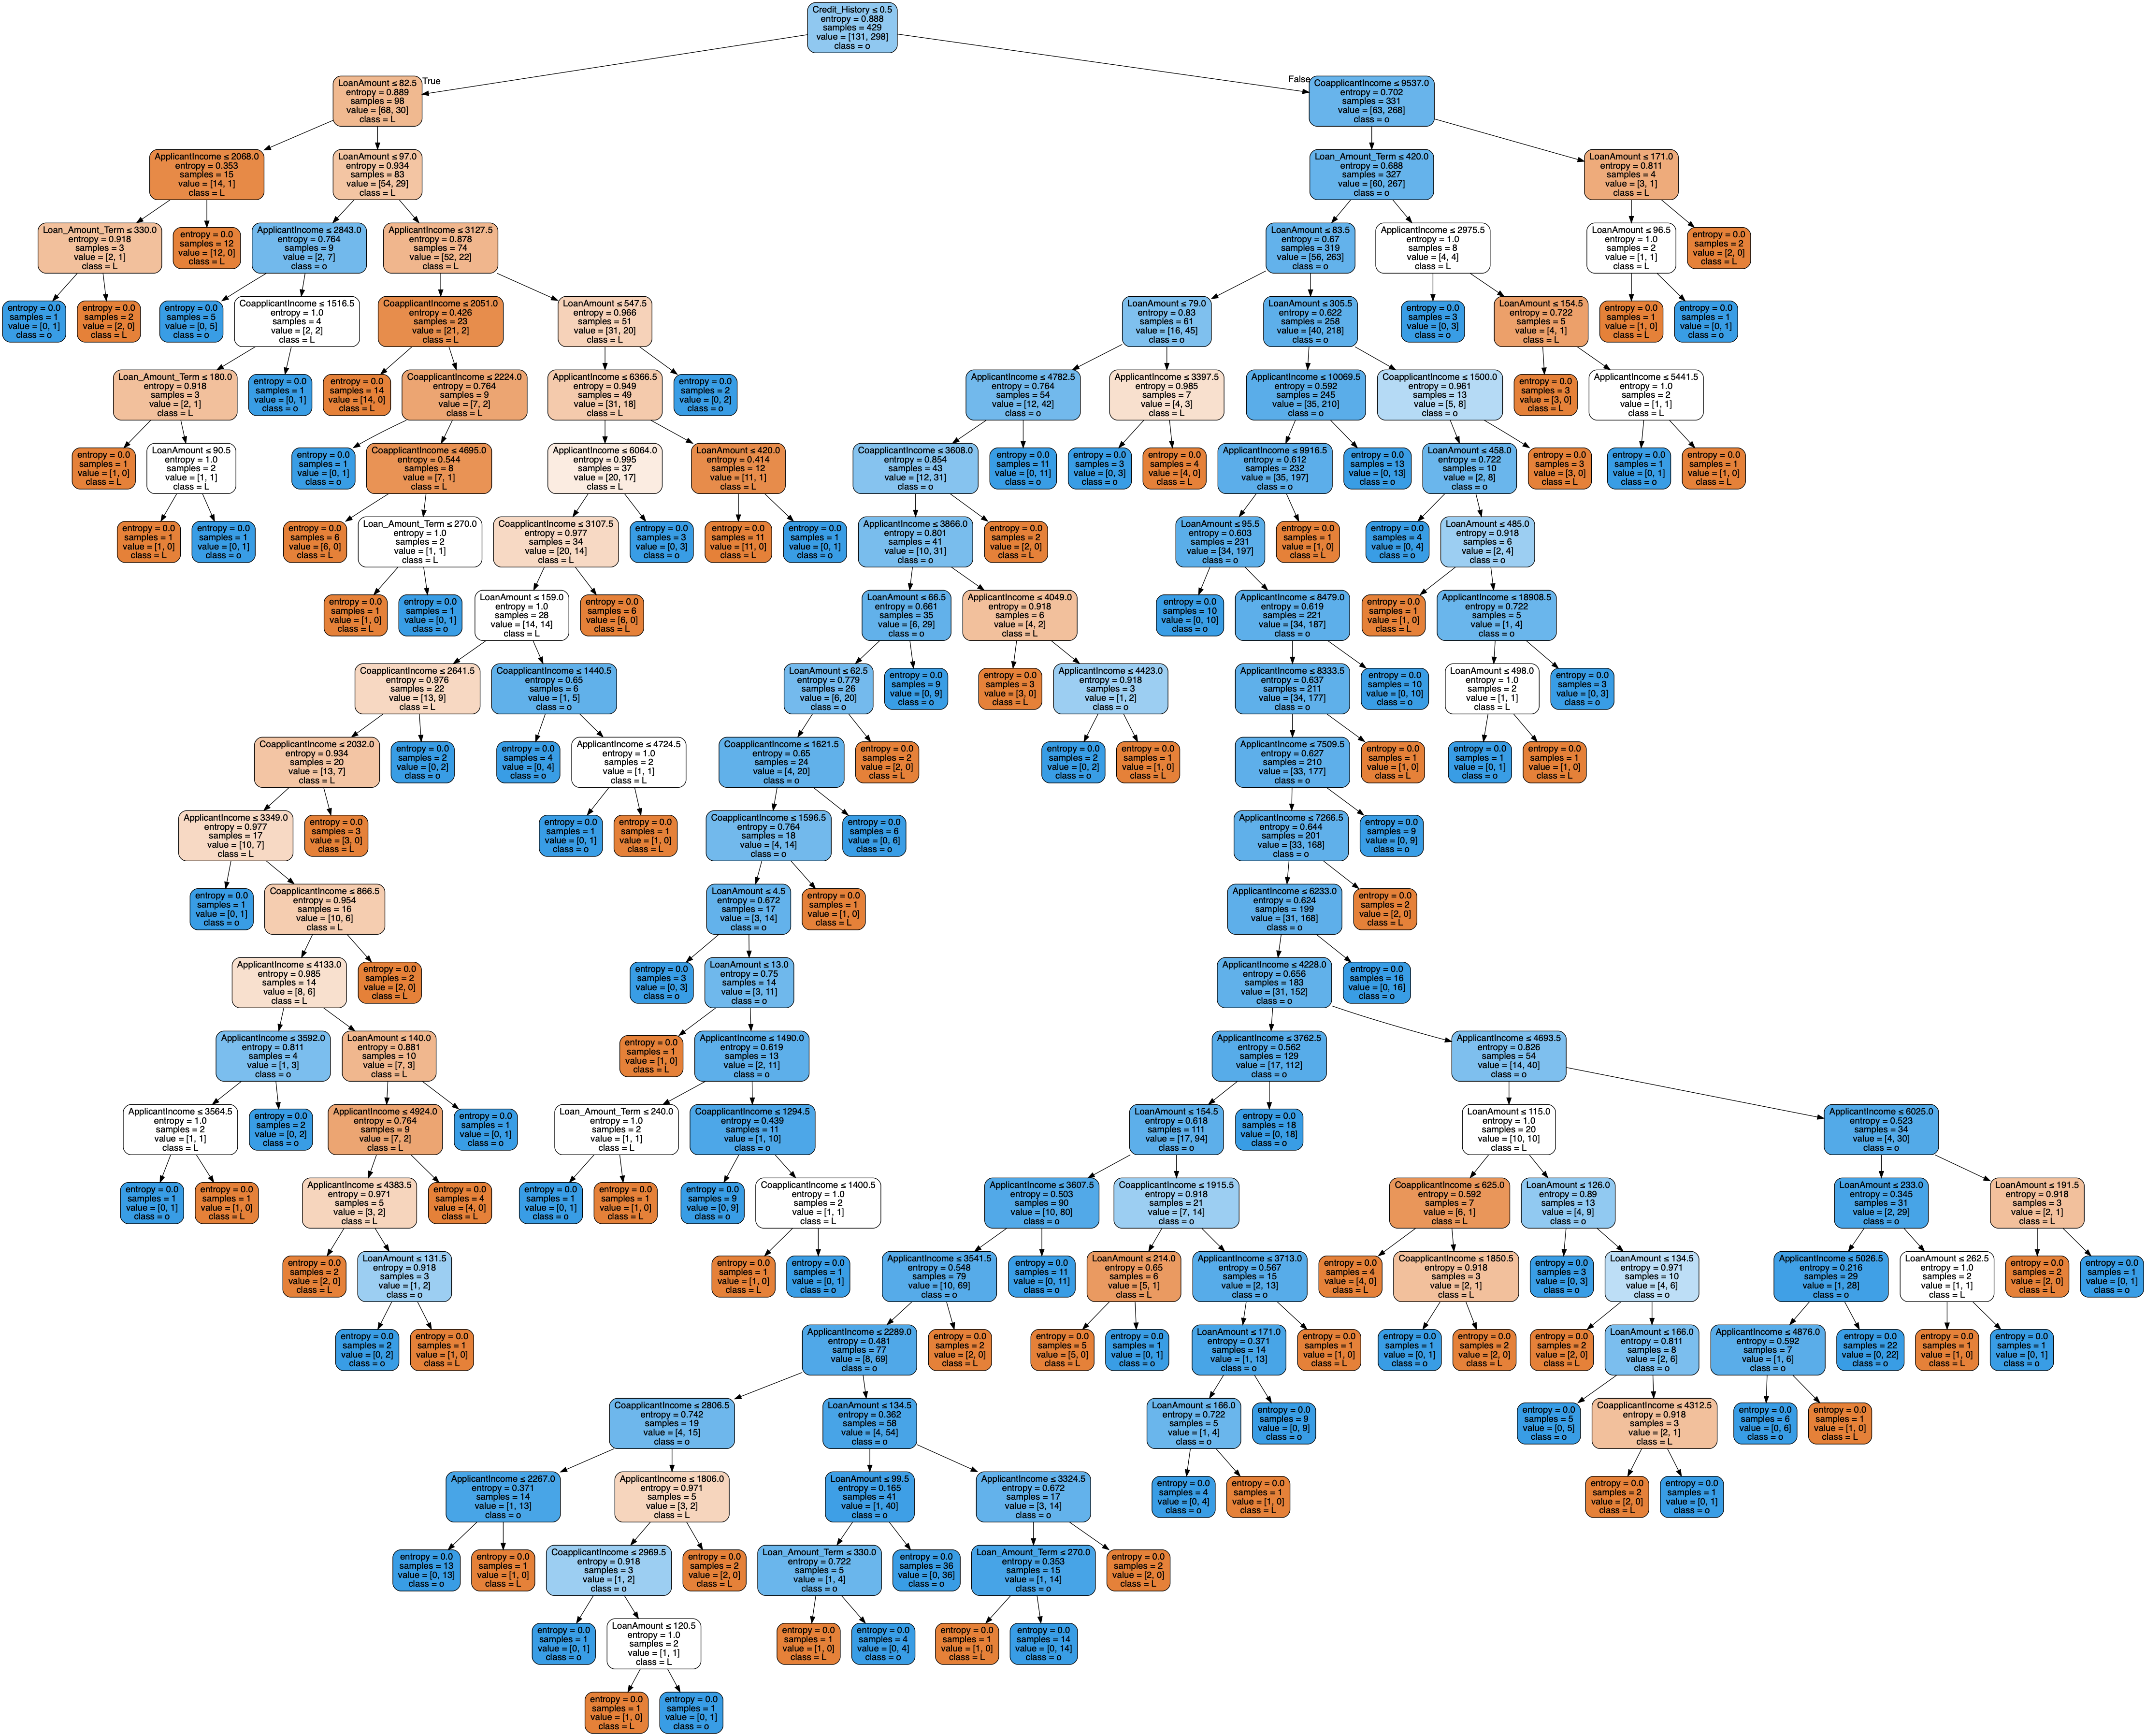

In [32]:
from sklearn import tree
import pydotplus
from IPython.display import Image
X = 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
y = 'Loan_Status'
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                               feature_names=X,
                               class_names=y,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
OVER-FITTING
Vanilla DT --> OVER-FIT

## Lucius' Thoughts
***
- Lucius was curious to alter some parameters of his Decision Tree in order to prevent over-fitting and get a better accuracy. (we got accuracies below ~ 70% which suggest that our models were not that good) 

So, what are the key parameters of tree modeling and how can we avoid over-fitting in decision trees?

 - Let's discuss this and build our intuition

## Shortcomings decision trees

- Overfitting is one of the key challenges faced while modeling decision trees
- If there is no limit set of a decision tree, it will give you 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation
- Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

    - Setting constraints on tree size
    - Tree pruning

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Setting Constraints 
***
- First, lets look at the general structure of a decision tree:

<center><img src="../images/dt12.png" alt="Drawing" style="width: 750px;"/></center>

**Minimum samples for a node split**
 - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
 - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 - Too high values can lead to under-fitting hence, it should be tuned using CV.




**Minimum samples for a terminal node (leaf)**
 - Defines the minimum samples (or observations) required in a terminal node or leaf.
 - Used to control over-fitting similar to min_samples_split.
 - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.


**Maximum depth of tree (vertical depth)**

- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.

**Maximum number of terminal nodes**
 - The maximum number of terminal nodes or leaves in a tree.
 - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of $2^n$ leaves.

**Maximum features to consider for split**
 - The number of features to consider while searching for a best split. These will be randomly selected.
 - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
 - Higher values can lead to over-fitting but depends on case to case.

## Lucius Approach -2 : Effect of varying max_depth
***

Lucius chose **Depths of 2 and 5 respectively **and then compared the results to see which is better

In [33]:
clf_1 = DecisionTreeClassifier(max_depth = 2)
clf_1.fit(X_train,y_train)

clf_2 = DecisionTreeClassifier(max_depth = 5)
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pruning
ccp - cost complexity parameter

In [34]:
# predicting for both max depth 2 and 5.

y_clf_1 = clf_1.predict(X_test)
y_clf_2 = clf_2.predict(X_test)

In [35]:
#calculate accuracy
accuracy_clf_1 = accuracy_score(y_test,y_clf_1)
accuracy_clf_2 = accuracy_score(y_test,y_clf_2)

In [36]:
accuracy_clf_1

0.7405405405405405

In [37]:
accuracy_clf_2

0.7405405405405405

## Better Results: 
***
- Lucius compared these results with what he got before 
- We can notice that the accuracies of both these models is better than the models before ( ~ 64%) 

**NOTE** : In Python, the default criterion to make the splits is the Gini Index unless specified otherwise!

## Figuring out his Future
***
- Now, using this, Lucius wanted to check if he would get a loan too
- Therefore, for the sake of simplicity let's assume that the loan amounts in the dataset are in Thousands of dollars

- Each semester, NYU charges a whopping $26,500 for his course
- His program is 6 semesters long and he needs the fees for all the 6 semesters 



In [ ]:
## Enter your code here: Predict Lucius future, well, somewhat!

In [ ]:
HW
1. Complete the above notebook - remaining criteria
2. Complete the theory
3. Code Along

In [ ]:
Var ---> Target

## Advantages of Decision Trees: 
***
1) Easy to Understand: 
- Decision tree output is very easy to understand even for people from non-analytical background. 
- It does not require any statistical knowledge to read and interpret them.
- Its graphical representation is very intuitive and users can easily relate their hypothesis.




2) Useful in Data exploration: 
- Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. - With the help of decision trees, we can create new variables / features that has better power to predict target variable. -  It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.

3) Less data cleaning required: 
- It requires less data cleaning compared to some other modeling techniques.
- It is not influenced by outliers and missing values to a fair degree.


4) Data type is not a constraint:
- It can handle both numerical and categorical variables.

5) Non Parametric Method: 
- Decision tree is considered to be a non-parametric method. 
- This means that decision trees have no assumptions about the space distribution and the classifier structure.

## Drawbacks of Decision Trees
***
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## In-class Activity 

## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

## Reading Train and Test data

In [ ]:
data_train = pd.read_csv('../data/adult_train.csv')
data_train.tail()

In [ ]:
data_test = pd.read_csv('../data/adult_test.csv')
data_test.tail()

### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [ ]:
# Your code here

# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

# encode target variable as integer
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

### Find the statistics of the test data and count the distribution of target variable in train data 

In [ ]:
# Your code here

data_test.describe(include='all').T

In [ ]:
# Your code here

data_train['Target'].value_counts()

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

In [ ]:
# Your code here

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


As you can see from the plots above our data is mostly concentrated in the USA with mostly male white 
people.This is a good thing to notice, as it may impact the conclusions we come to later.

### Calculate the percentage of adults from each country in the data *

In [ ]:
# Your code here

(data_train["Country"].value_counts() / data_train.shape[0]).head()

```python
Indeed! 89% of the samples are for people from the US. Mexico comes next with less than 2%.
```

### Check the data types of train and test data *

In [ ]:
# Your code here

print(data_train.dtypes)
print(data_test.dtypes)

```python
As we see, in the test data, age is treated as type object. We need to fix this.
```

### As we have seen in the earlier task, the data type of age in the test data is object type, so we will have to convert the data type of `Age` column in the test data to `int` type. 

In [ ]:
# Your code here

data_test['Age'] = data_test['Age'].astype(int)

### Also cast all float features to int type to keep types consistent between our train and test data.

In [ ]:
# Your code here

data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

### We have to treat categorical and numerical data in different ways for cleaning the data and encoding, so we will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [ ]:
# Your code here

# choose categorical and continuous features from data

categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

### As we have already separated the numerical and categorical columns, we will fill in missing data for continuous features with their median values, for categorical features with their mode

In [ ]:
# Your code here

# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

### Machines only understand numbers, so we will have to represent the categorical variables in a way so that the computer understands it, so we will first label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [ ]:
# Your code here

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in categorical_columns:
    data_train[x] = le.fit_transform(data_train[x])
    data_test[x] = le.transform(data_test[x])

In [ ]:
# Alternate way with a single line of code to encode data with categorical data without complicating if you want to use.

pd.get_dummies(data=data_train, columns = categorical_columns).shape

data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

data_train.shape

### Split train and test data into X_train ,y_train,X_test and y_test data

In [ ]:
# Your code here

X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [ ]:
# Your code here

tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_test) 

In [ ]:
# Your code here

# Check the accuracy score

print("Decision tree accuracy: ",accuracy_score(y_test,tree_predictions))

### We see that the accuracy we got is 84% without using parameter tuning Now lets see if we can increase our model accuracy by using Decision tree with parameter tuning
* Create a dictionary with Key as `'max_depth'` and value as `range(2,11)` and save it as tree_params.
* Train a decision tree (DecisionTreeClassifier(random_state = 17),tree_params). Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [ ]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  


# Your code here

locally_best_tree.fit(X_train, y_train)

### Print out optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

In [ ]:
# Your code here

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

### Train a decision tree with maximum depth of 9 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

In [ ]:
# Your code here

tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_test, tuned_tree_predictions))

### Lets plot the decision tree and see its distibution of classes

* Use the tree.export_graphviz() module to create the graphic visualization object of the learned tree classifier .Input the parameters tuned_tree, out_file=None, feature_names=X_train.columns, filled = True, class_names=['class_no','class_yes'] and save it as dot_data

* Use the pydotplus.graph_from_dot_data() module to draw the graph. Save it as graph

* To display the graph we save the above created image into a file and display it using matplotlib as  Image(graph.create_png())

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(tuned_tree, out_file=None, 
                                feature_names=X_train.columns, filled = True,  
                                class_names=['class_yes','class_no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
# Create PNG
graph.write_png("graph.png")

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>

<br />

# In-session Recap Time
***
- What is Decision Trees and how to use it?
- Splits in Decision Trees
    - Gini Index
    - Entropy
    - Chi Squared
- Advantages of Decision Trees
- Drawbacks of Decsion Trees


# Thank You
***
### Coming up next...
***
- Ensembling